In [1]:
import numpy as np
pi = np.pi
from qutip import *

from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import gate_sequence_product, rx
from qutip.qip.device import *
from qutip.qip import pulse

#print(qutip.qip.device.__file__)

#import qip.ethprocessor as qip
%load_ext autoreload
%autoreload 2

# One qubit test

## Quantum Circuit

In [2]:
# Number of qubits in the system
N = 1

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("RX", 0, None, np.pi/2, r"\pi/2")
#qc.add_gate("RX", 0, None, np.pi/3, r"\pi/3")

qc.png

### ETH Processor

In [3]:
from qip.ethprocessor import ETHProcessor

# Resonance frequency in GHz
omega = 5.708390 * 2*pi

# Self-Kerr coefficient (anharmonicity) in GHz
alpha = -0.275172227 * 2*pi

eth = ETHProcessor(N = 1, resonance_freq = omega, anharmonicity = alpha, correct_global_phase=False)

tlist, coeffs = eth.load_circuit(qc)

len sctrls [Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         1.         0.        ]
 [1.         0.         1.41421356]
 [0.         1.41421356 0.        ]], Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.-1.j         0.+0.j        ]
 [0.+1.j         0.+0.j         0.-1.41421356j]
 [0.+0.j         0.+1.41421356j 0.+0.j        ]]]


### Plot pulses

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff80878a700>)

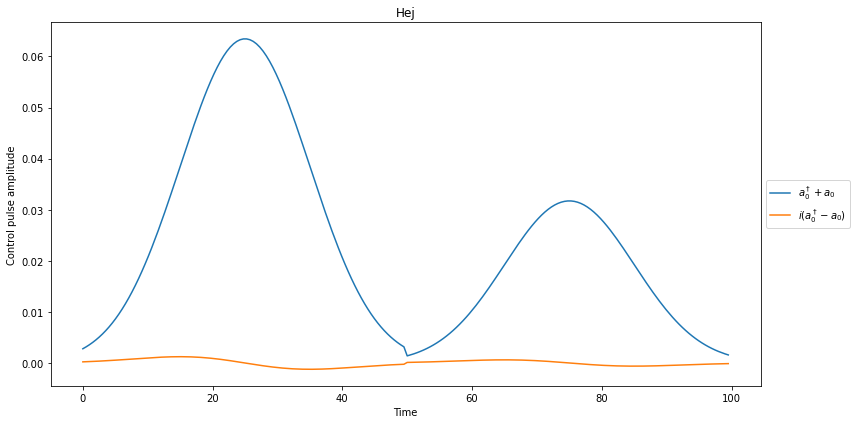

In [4]:
eth.plot_pulses(title='Hej')

## Execute quantum circuit

In [5]:
result = eth.run_state(init_state = basis(3,0), qc = qc, analytical=False)

len sctrls [Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         1.         0.        ]
 [1.         0.         1.41421356]
 [0.         1.41421356 0.        ]], Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.-1.j         0.+0.j        ]
 [0.+1.j         0.+0.j         0.-1.41421356j]
 [0.+0.j         0.+1.41421356j 0.+0.j        ]]]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_get_qobjevo_helper', 'coeff', 'get_qobj', 'get_qobjevo', 'qobj', 'targets', 'tlist']
{'qobj': Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0

In [6]:
final_state = result.states[-1]

In [7]:
# project onto qubit subspace
qubit_state = Qobj(final_state.data[0:2], dims = [[2],[1]])

# normalize qubit state
qubit_state_norm = qubit_state / qubit_state.norm()

# target state
target_state = rx(np.pi)*rx(np.pi/2)*basis(2,0)

# fidelity
fid = fidelity(target_state, qubit_state_norm)
print('Fidelity = %s %%' % round(fid*100,4)) # Should be close to 100 %

Fidelity = 99.9998 %


# Two qubit test

## Quantum Circuit

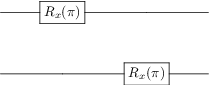

In [8]:
# Number of qubits in the system
N = 2

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("RX", 1, None, np.pi, r"\pi")
#qc.add_gate("RX", 0, None, np.pi/2, r"\pi/2")
qc.png

In [9]:
qc.depth()

1

In [10]:
qc.layers()

[[Gate(RX, targets=[0], controls=None), Gate(RX, targets=[1], controls=None)]]

### ETH Processor

In [12]:
from qip.ethprocessor import ETHProcessor
import numpy as np

pi = np.pi

# Resonance frequency in GHz
omega = 5.708390 * 2*pi

# Self-Kerr coefficient (anharmonicity) in GHz
alpha = -0.275172227 * 2*pi

eth = ETHProcessor(N = 2, resonance_freq = omega, anharmonicity = alpha)

tlist, coeffs = eth.load_circuit(qc)

len sctrls [Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0.         0.         0.         1.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  1.41421356 0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         1.41421356 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         1.41421356]
 [0.         0.         0.         1.41421356 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.41421356
  0.         0.         0.        ]], Quantum object: di

### Plot pulses

(<Figure size 1800x900 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff7b89748b0>)

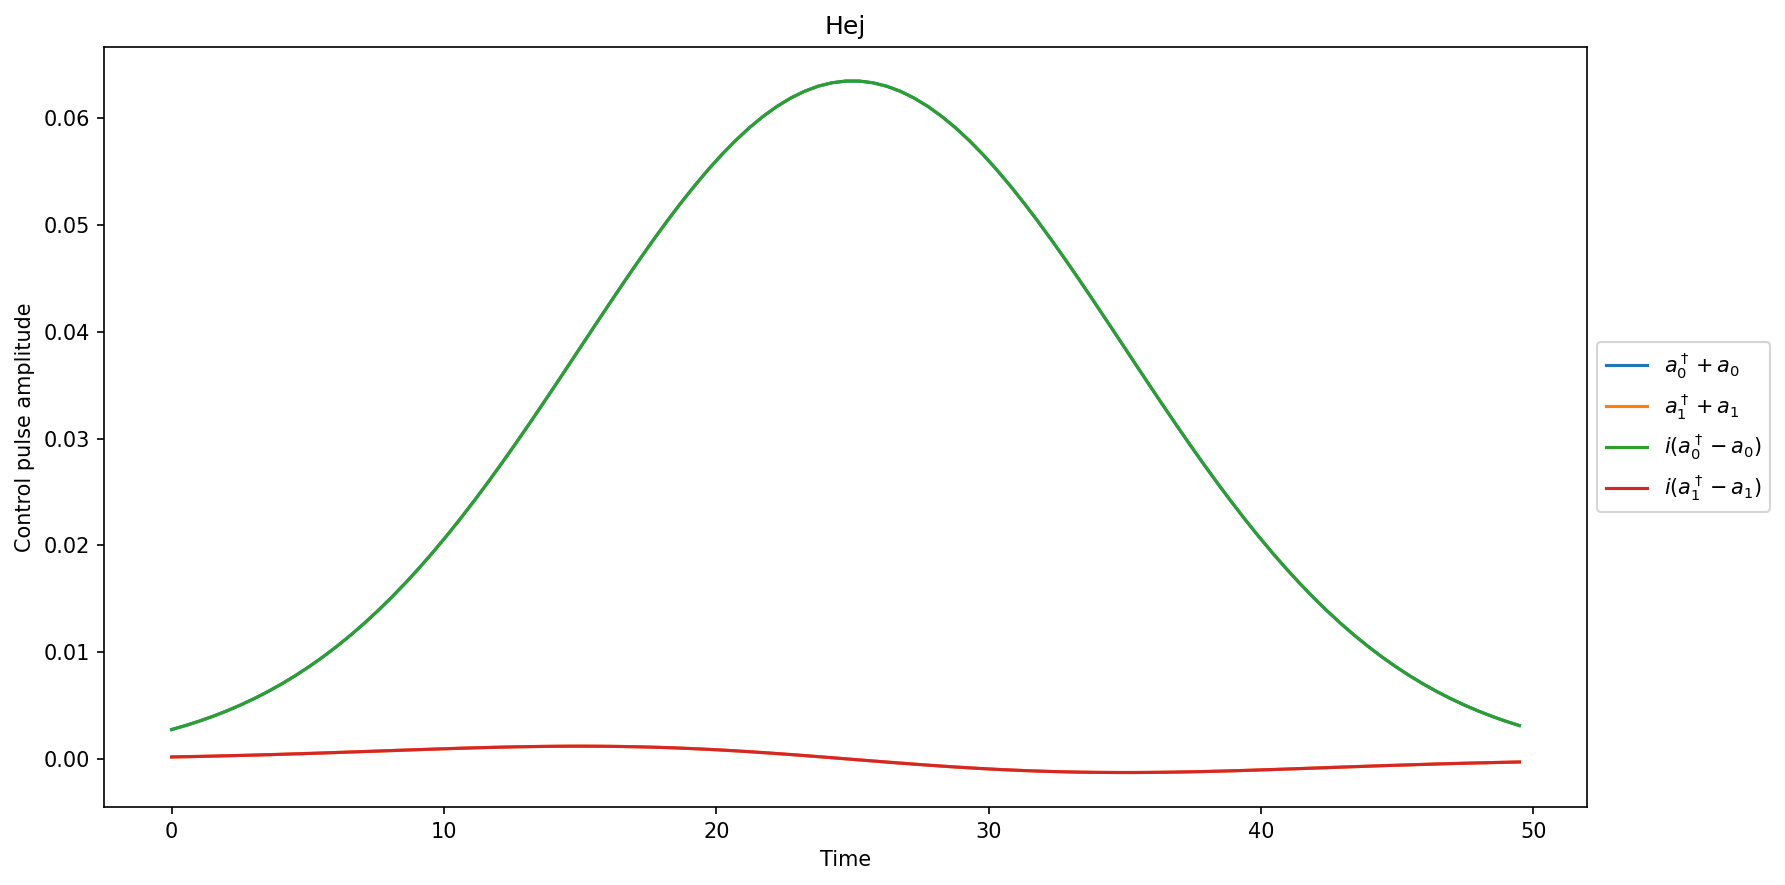

In [13]:
eth.plot_pulses(title='Hej', dpi=150)

## Run state

In [14]:
result = eth.run_state(init_state = tensor(basis(3,0),basis(3,0)), qc = qc, analytical=False)

len sctrls [Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0.         0.         0.         1.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  1.41421356 0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         1.41421356 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         1.41421356]
 [0.         0.         0.         1.41421356 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.41421356
  0.         0.         0.        ]], Quantum object: di

In [15]:
final_state = result.states[-1]
final_state

Quantum object: dims = [[3, 3], [1, 1]], shape = (9, 1), type = ket
Qobj data =
[[ 1.10827111e-05-6.99087562e-06j]
 [-1.60814828e-03-1.99354082e-03j]
 [-3.82385748e-06-5.38592515e-06j]
 [-1.60814828e-03-1.99354082e-03j]
 [-9.96589428e-01+8.23599664e-02j]
 [-2.57107464e-03+5.39226138e-05j]
 [-3.82385748e-06-5.38592515e-06j]
 [-2.57107464e-03+5.39226138e-05j]
 [-6.60812253e-06-2.67901910e-07j]]

In [16]:
# project onto qubit subspace
qubit_state = (tensor(basis(2,0),basis(2,0))*tensor(basis(3,0),basis(3,0)).dag() \
               + tensor(basis(2,1),basis(2,1))*tensor(basis(3,1),basis(3,1)).dag() \
               + tensor(basis(2,0),basis(2,1))*tensor(basis(3,0),basis(3,1)).dag() \
               + tensor(basis(2,1),basis(2,0))*tensor(basis(3,1),basis(3,0)).dag())*final_state

# normalize
qubit_state = qubit_state / qubit_state.norm()

# target state -|11⟩
target_state = tensor(rx(np.pi), rx(np.pi)) * tensor(basis(2,0),basis(2,0))

print(target_state)
# fidelity
fid = fidelity(qubit_state,target_state)
print('Fidelity =',round(fid,4))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [-1.]]
Fidelity = 1.0


In [17]:
qubit_state

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.10827844e-05-6.99092185e-06j]
 [-1.60815891e-03-1.99355400e-03j]
 [-1.60815891e-03-1.99355400e-03j]
 [-9.96596019e-01+8.23605110e-02j]]

### Circuit depth test

In [18]:
# Number of qubits in the system
N = 3

# Input state
input_states = ["0"]*N

# A list of integers for the dimension of each composite system.
dims = [3]*N

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, input_states = input_states, dims = dims, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("RX", 1, None, np.pi/2, r"\pi/2")
qc.add_gate("RX", 2, None, np.pi/3, r"\pi/3")
qc.add_gate("CNOT", controls=[2], targets=[1])
#qc.add_gate("CNOT", controls=[2], targets=[0])
qc.add_gate("RX", 0, None, np.pi/3, r"\pi/3")
qc.depth

<bound method QubitCircuit.depth of <qutip.qip.circuit.QubitCircuit object at 0x7ff7e95df1f0>>

## Gate shit

In [14]:
num_ops = 4
coeff_list = [[] for i in range(num_ops)]
I = list(range(3))
Q = list(range(4,8))

In [15]:
coeff_list[0].append(I)
coeff_list[1].append(Q)

In [16]:
print(coeff_list)

[[[0, 1, 2]], [[4, 5, 6, 7]], [], []]


In [17]:
num_ops = 4
layer = 0
targets = [0,1]

coeff_len = 0
for i in range(num_ops):
    try:
        if len(coeff_list[i][layer]) > coeff_len:
            coeff_len = len(coeff_list[i][layer])
    except:
        0
print(coeff_len)
print(coeff_list)

for i in range(num_ops):
    try:
        if len(coeff_list[i][layer]) < coeff_len:
            coeff_list[i][layer].extend([0] * (coeff_len-len(coeff_list[i][layer])))
    except:
        coeff_list[i].append([0] * coeff_len)
            

4
[[[0, 1, 2]], [[4, 5, 6, 7]], [], []]


In [18]:
# Join sublists
for i in range(num_ops):
    coeff_list[i] = np.array(sum(coeff_list[i], []))

In [19]:
coeff_list

[array([0, 1, 2, 0]),
 array([4, 5, 6, 7]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0])]

In [20]:
np.shape(coeff_list)

(4, 4)